In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bank_transactions_data_2.csv to bank_transactions_data_2.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('bank_transactions_data_2.csv')

df.head()


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# 1. Đọc dữ liệu

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [ ]:
df.shape

(2512, 16)

In [ ]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [ ]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2512 non-null   object        
 1   AccountID                2512 non-null   object        
 2   TransactionAmount        2512 non-null   float64       
 3   TransactionDate          2512 non-null   datetime64[ns]
 4   TransactionType          2512 non-null   object        
 5   Location                 2512 non-null   object        
 6   DeviceID                 2512 non-null   object        
 7   IP Address               2512 non-null   object        
 8   MerchantID               2512 non-null   object        
 9   Channel                  2512 non-null   object        
 10  CustomerAge              2512 non-null   int64         
 11  CustomerOccupation       2512 non-null   object        
 12  TransactionDuration      2512 non-

In [ ]:
df.isnull().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [ ]:
df.isna().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

==> Dữ liệu đã sạch

# 2. Đặc tả dữ liệu thống kê

In [ ]:
print("📊 THỐNG KÊ MÔ TẢ CHO CÁC CỘT SỐ:")
print(df.describe(include=[float, int]))


📊 THỐNG KÊ MÔ TẢ CHO CÁC CỘT SỐ:
       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2512.000000  2512.000000          2512.000000    2512.000000   
mean          297.593778    44.673965           119.643312       1.124602   
std           291.946243    17.792198            69.963757       0.602662   
min             0.260000    18.000000            10.000000       1.000000   
25%            81.885000    27.000000            63.000000       1.000000   
50%           211.140000    45.000000           112.500000       1.000000   
75%           414.527500    59.000000           161.000000       1.000000   
max          1919.110000    80.000000           300.000000       5.000000   

       AccountBalance  
count     2512.000000  
mean      5114.302966  
std       3900.942499  
min        101.250000  
25%       1504.370000  
50%       4735.510000  
75%       7678.820000  
max      14977.990000  


In [ ]:
print("\n🔠 THỐNG KÊ MÔ TẢ CHO CÁC CỘT PHÂN LOẠI:")
print(df.describe(include=[object]))



🔠 THỐNG KÊ MÔ TẢ CHO CÁC CỘT PHÂN LOẠI:
       TransactionID AccountID TransactionType    Location DeviceID  \
count           2512      2512            2512        2512     2512   
unique          2512       495               2          43      681   
top         TX000001   AC00362           Debit  Fort Worth  D000697   
freq               1        12            1944          70        9   

            IP Address MerchantID Channel CustomerOccupation  
count             2512       2512    2512               2512  
unique             592        100       3                  4  
top     200.136.146.93       M026  Branch            Student  
freq                13         45     868                657  


In [ ]:
# In số lượng giá trị unique cho mỗi cột
print("\n🔍 SỐ GIÁ TRỊ UNIQUE THEO CỘT:")
for col in df.columns:
    unique_vals = df[col].nunique()
    print(f"{col}: {unique_vals} giá trị duy nhất")


🔍 SỐ GIÁ TRỊ UNIQUE THEO CỘT:
TransactionID: 2512 giá trị duy nhất
AccountID: 495 giá trị duy nhất
TransactionAmount: 2455 giá trị duy nhất
TransactionDate: 2512 giá trị duy nhất
TransactionType: 2 giá trị duy nhất
Location: 43 giá trị duy nhất
DeviceID: 681 giá trị duy nhất
IP Address: 592 giá trị duy nhất
MerchantID: 100 giá trị duy nhất
Channel: 3 giá trị duy nhất
CustomerAge: 63 giá trị duy nhất
CustomerOccupation: 4 giá trị duy nhất
TransactionDuration: 288 giá trị duy nhất
LoginAttempts: 5 giá trị duy nhất
AccountBalance: 2510 giá trị duy nhất
PreviousTransactionDate: 360 giá trị duy nhất


In [ ]:
print("\n📌 TẦN SUẤT GIÁ TRỊ TRONG CÁC CỘT:")
for col in df.columns:
    print(f"\n🎯 Cột: {col}")
    print(df[col].value_counts().head(10))


📌 TẦN SUẤT GIÁ TRỊ TRONG CÁC CỘT:

🎯 Cột: TransactionID
TransactionID
TX000001    1
TX001679    1
TX001672    1
TX001673    1
TX001674    1
TX001675    1
TX001676    1
TX001677    1
TX001678    1
TX001680    1
Name: count, dtype: int64

🎯 Cột: AccountID
AccountID
AC00362    12
AC00363    12
AC00202    12
AC00460    12
AC00257    11
AC00456    11
AC00304    11
AC00480    11
AC00225    11
AC00267    10
Name: count, dtype: int64

🎯 Cột: TransactionAmount
TransactionAmount
11.46     3
233.74    2
5.29      2
38.14     2
103.08    2
642.68    2
211.36    2
175.07    2
34.74     2
485.54    2
Name: count, dtype: int64

🎯 Cột: TransactionDate
TransactionDate
2023-04-11 16:29:14    1
2023-12-15 16:38:43    1
2023-03-20 16:02:51    1
2023-11-15 17:32:11    1
2023-09-11 17:52:59    1
2023-07-27 17:51:27    1
2023-10-13 16:05:10    1
2023-07-10 16:41:50    1
2023-10-27 17:53:06    1
2023-07-03 16:38:45    1
Name: count, dtype: int64

🎯 Cột: TransactionType
TransactionType
Debit     1944
Credit  

# 3. Thực hiện tính toán trên dữ liệu

In [ ]:

# Cột thời gian
# Chuyển đổi TransactionDate và PreviousTransactionDate thành datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce')
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'], errors='coerce')
df['TransactionHour'] = df['TransactionDate'].dt.hour
df['TransactionDayOfWeek'] = df['TransactionDate'].dt.dayofweek
df['IsWeekend'] = df['TransactionDayOfWeek'].isin([5, 6])  # Saturday, Sunday

# Khoảng cách giữa 2 giao dịch
# Need to handle potential NaT in either column for this calculation
df['DaysSinceLastTransaction'] = (df['TransactionDate'] - df['PreviousTransactionDate']).dt.days

# Giao dịch lớn
threshold = df['TransactionAmount'].quantile(0.95)
df['IsHighAmount'] = df['TransactionAmount'] > threshold

# Giao dịch Online
df['IsOnlineTransaction'] = df['Channel'].str.lower() == 'online'

# Tỷ lệ Transaction / Account Balance
df['TransactionToBalanceRatio'] = df['TransactionAmount'] / (df['AccountBalance'] + 1e-5)  # tránh chia 0

# Đăng nhập đáng ngờ
df['IsSuspiciousLogin'] = df['LoginAttempts'] > 3

# Mismatch location (VD nếu dùng online nhưng location không hợp lý - đây là giả định đơn giản)
df['LocationChannelMismatch'] = df.apply(
    lambda row: row['IsOnlineTransaction'] and row['Location'] not in ['Online', 'Web'], axis=1
)

# Ước lượng tuổi tài khoản (giả sử ngày hiện tại ~2025-04-01)
df['AccountAgeInYears'] = (pd.to_datetime("2025-04-01") - df['PreviousTransactionDate']).dt.days / 365

In [ ]:
df

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,...,TransactionHour,TransactionDayOfWeek,IsWeekend,DaysSinceLastTransaction,IsHighAmount,IsOnlineTransaction,TransactionToBalanceRatio,IsSuspiciousLogin,LocationChannelMismatch,AccountAgeInYears
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,...,16,1,False,-573,False,False,0.002756,False,False,0.40274
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,...,16,1,False,-496,False,False,0.027345,False,False,0.40274
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,...,18,0,False,-483,False,True,0.112523,False,True,0.40274
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,...,16,4,False,-549,False,True,0.021531,False,True,0.40274
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,...,17,0,False,-385,False,True,0.001810,False,True,0.40274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,2023-04-26 17:09:36,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,...,17,2,False,-558,False,False,0.067467,False,False,0.40274
2508,TX002509,AC00322,251.54,2023-03-22 17:36:48,Debit,Tucson,D000410,49.174.157.140,M029,Branch,...,17,2,False,-593,False,False,0.987399,False,False,0.40274
2509,TX002510,AC00095,28.63,2023-08-21 17:08:50,Debit,San Diego,D000095,58.1.27.124,M087,Branch,...,17,0,False,-441,False,False,0.008463,False,False,0.40274
2510,TX002511,AC00118,185.97,2023-02-24 16:24:46,Debit,Denver,D000634,21.190.11.223,M041,Online,...,16,4,False,-619,False,True,0.104659,False,True,0.40274


# 4. Xuất file excel

In [ ]:
output_file = 'bank_transactions_output.xlsx'
df.to_excel(output_file, index=False)
print(f"Data has been saved to {output_file}")

Data has been saved to bank_transactions_output.xlsx


In [ ]:
df.columns

Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate',
       'TransactionHour', 'TransactionDayOfWeek', 'IsWeekend',
       'DaysSinceLastTransaction', 'IsHighAmount', 'IsOnlineTransaction',
       'TransactionToBalanceRatio', 'IsSuspiciousLogin',
       'LocationChannelMismatch', 'AccountAgeInYears'],
      dtype='object')

# 5. Trực quan hóa dữ liệu

<ipython-input-22-6619f9a72ed0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TransactionType', y='TransactionAmount', data=df, palette='viridis')


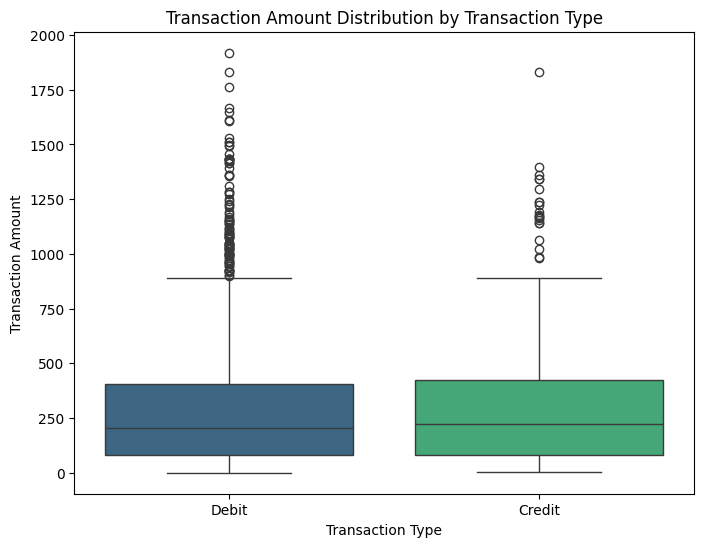

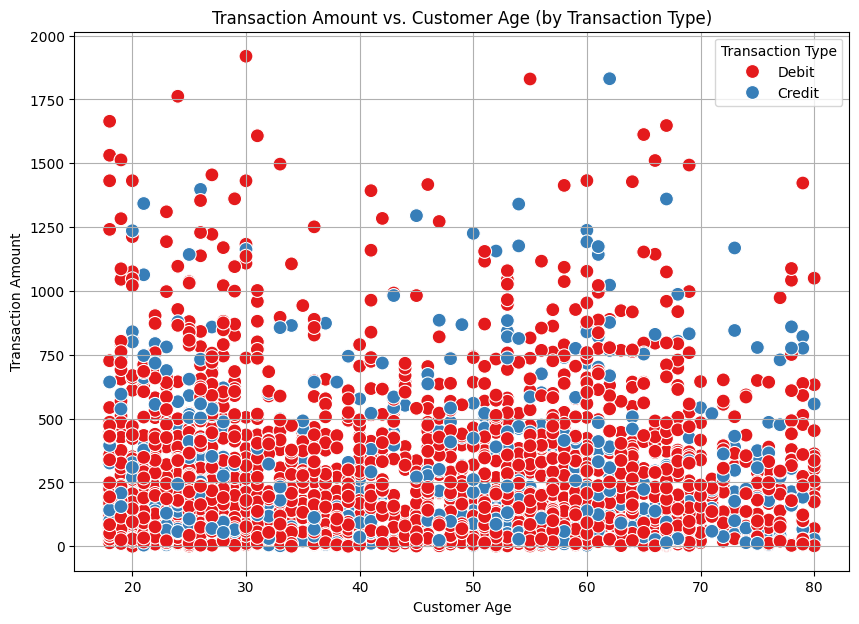

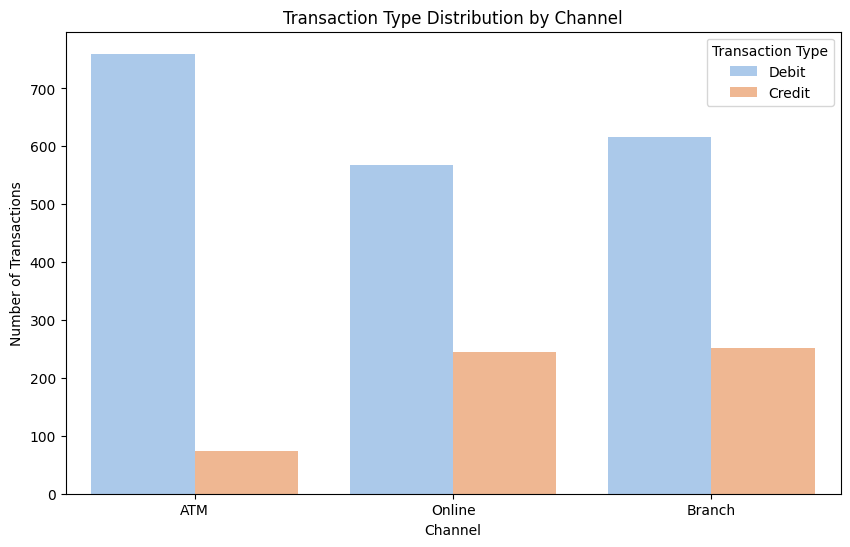

<ipython-input-22-6619f9a72ed0>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CustomerOccupation', y='CustomerAge', data=df, palette='Paired')


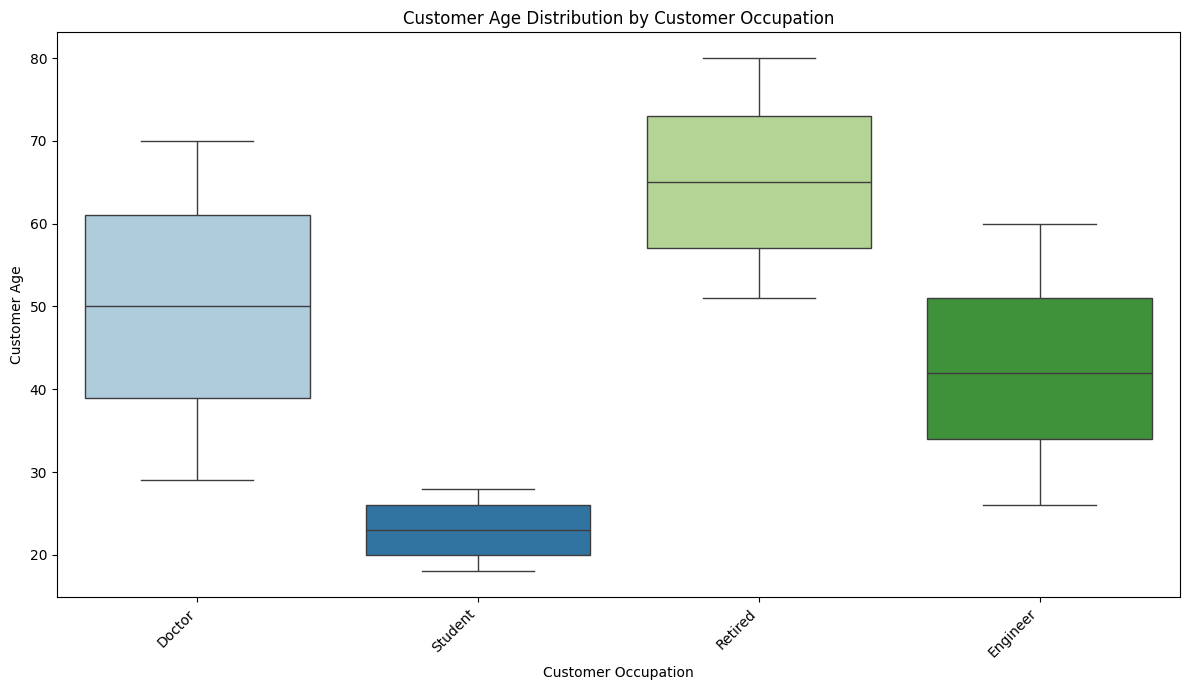

<ipython-input-22-6619f9a72ed0>:39: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='AccountBalance', y='TransactionToBalanceRatio', size='TransactionAmount', data=df,sizes=(20, 200), alpha=0.7, palette='plasma')


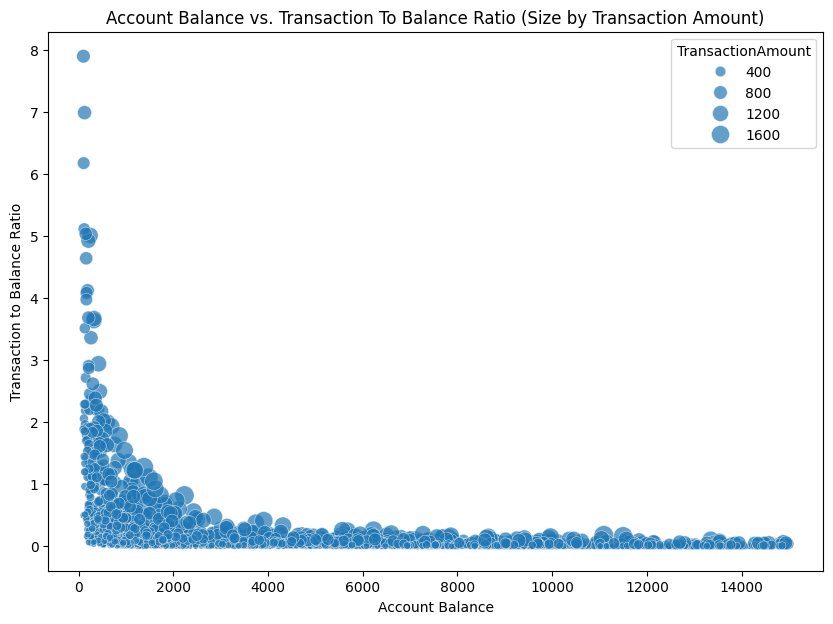

In [ ]:
# 1. Transaction Amount by Transaction Type (Box Plot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='TransactionType', y='TransactionAmount', data=df, palette='viridis')
plt.title('Transaction Amount Distribution by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')
plt.show()

# 2. Transaction Amount vs. Customer Age (Scatter Plot with Hue for Transaction Type)
plt.figure(figsize=(10, 7))
sns.scatterplot(x='CustomerAge', y='TransactionAmount', hue='TransactionType', data=df, palette='Set1', s=100)
plt.title('Transaction Amount vs. Customer Age (by Transaction Type)')
plt.xlabel('Customer Age')
plt.ylabel('Transaction Amount')
plt.legend(title='Transaction Type')
plt.grid(True)
plt.show()

# 3. Transaction Type Distribution by Channel (Count Plot with Hue)
plt.figure(figsize=(10, 6))
sns.countplot(x='Channel', hue='TransactionType', data=df, palette='pastel')
plt.title('Transaction Type Distribution by Channel')
plt.xlabel('Channel')
plt.ylabel('Number of Transactions')
plt.legend(title='Transaction Type')
plt.show()
# 8. Customer Age Distribution by Customer Occupation (Box Plot)
plt.figure(figsize=(12, 7))
sns.boxplot(x='CustomerOccupation', y='CustomerAge', data=df, palette='Paired')
plt.title('Customer Age Distribution by Customer Occupation')
plt.xlabel('Customer Occupation')
plt.ylabel('Customer Age')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#5. Account Balance vs. Transaction To Balance Ratio (Scatter Plot with Size for Transaction Amount)
plt.figure(figsize=(10, 7))
sns.scatterplot(x='AccountBalance', y='TransactionToBalanceRatio', size='TransactionAmount', data=df,sizes=(20, 200), alpha=0.7, palette='plasma')
plt.title('Account Balance vs. Transaction To Balance Ratio (Size by Transaction Amount)')
plt.xlabel('Account Balance')
plt.ylabel('Transaction to Balance Ratio')
plt.show()

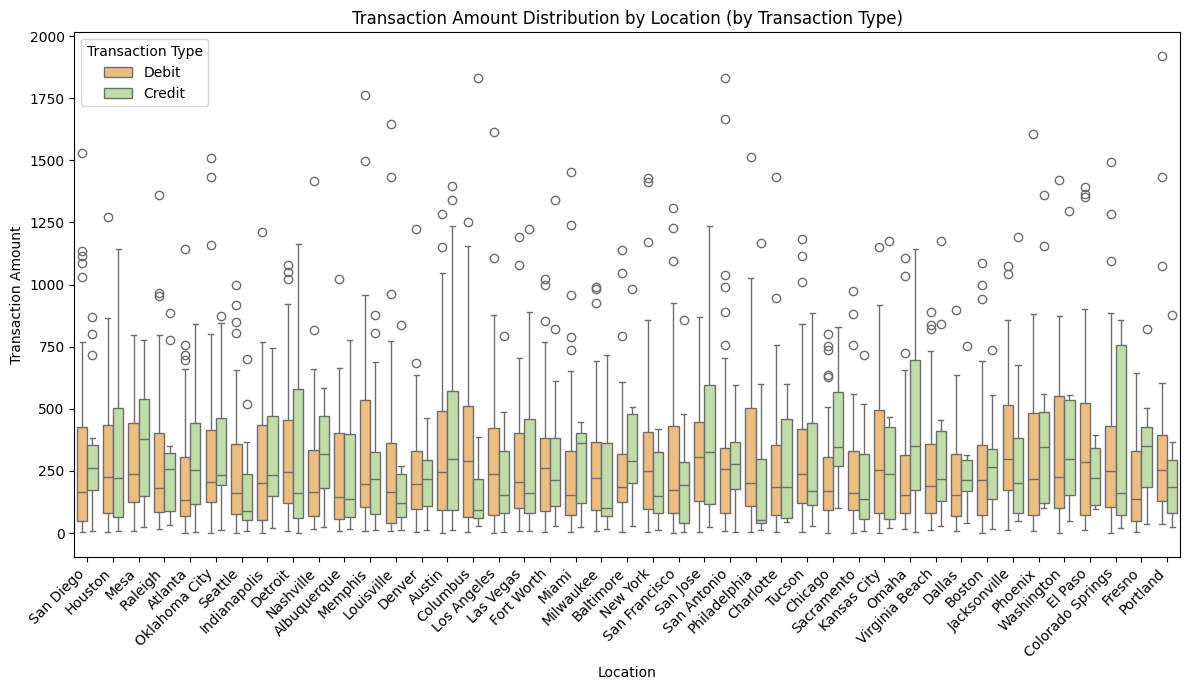

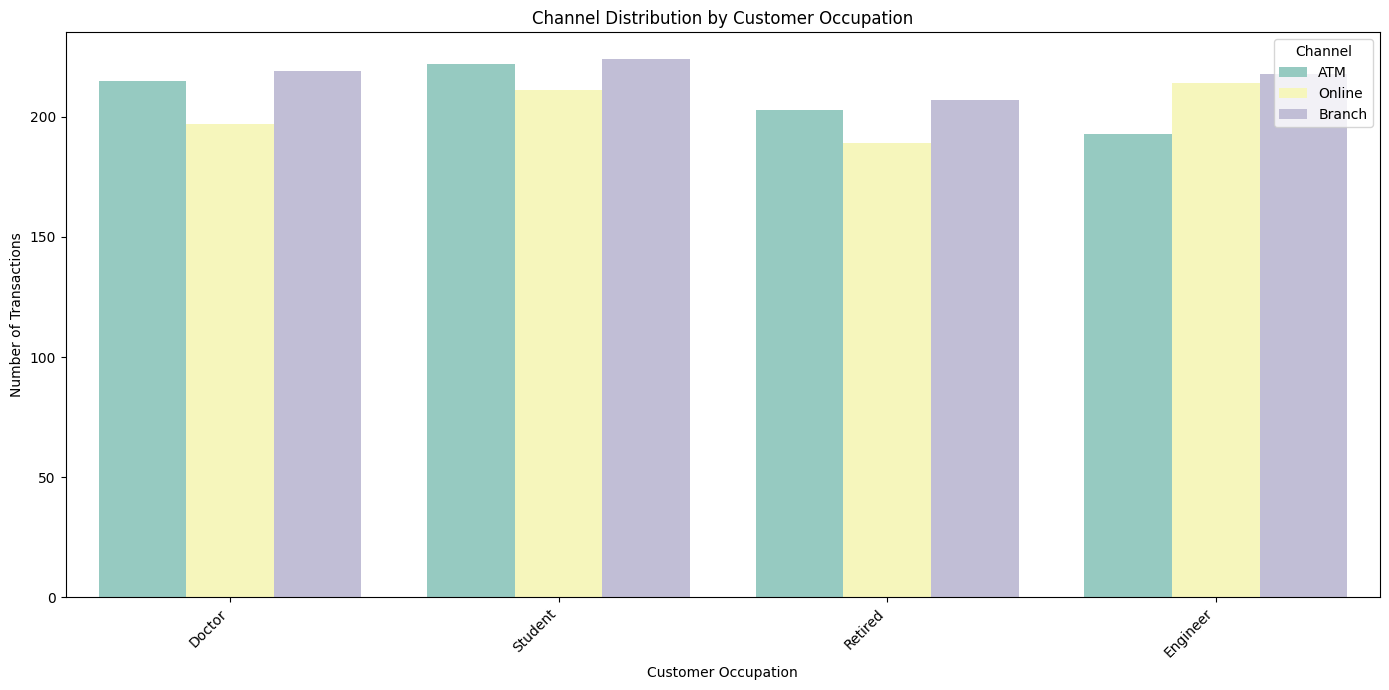

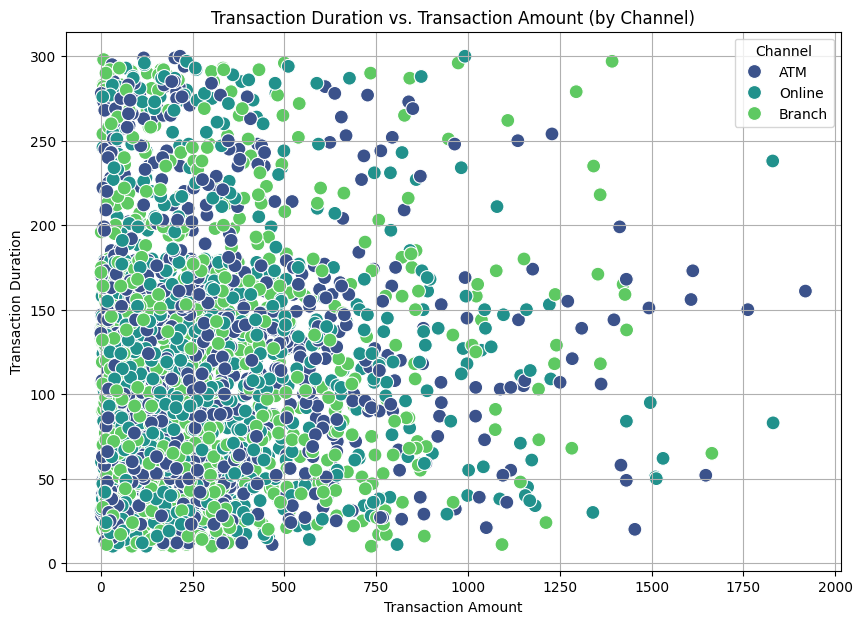

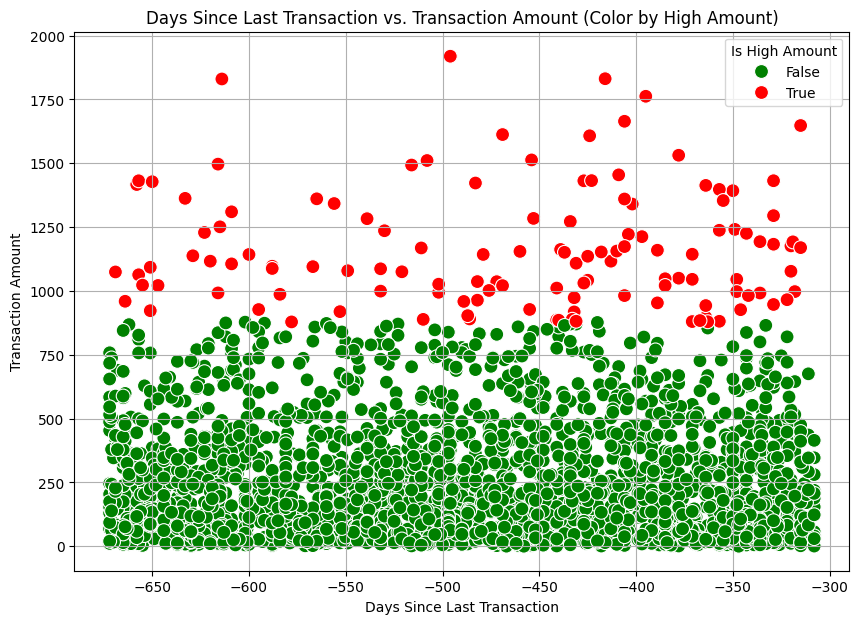

In [ ]:
# 6. Transaction Amount Distribution by Location (Box Plot with Hue for Transaction Type)
plt.figure(figsize=(12, 7))
sns.boxplot(x='Location', y='TransactionAmount', hue='TransactionType', data=df, palette='Spectral')
plt.title('Transaction Amount Distribution by Location (by Transaction Type)')
plt.xlabel('Location')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Type')
plt.tight_layout()
plt.show()

#7. Channel Distribution by Customer Occupation (Count Plot with Hue)
plt.figure(figsize=(14, 7))
sns.countplot(x='CustomerOccupation', hue='Channel', data=df, palette='Set3')
plt.title('Channel Distribution by Customer Occupation')
plt.xlabel('Customer Occupation')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Channel')
plt.tight_layout()
plt.show()

#8. Transaction Duration vs. Transaction Amount (Scatter Plot with Color for Channel)
plt.figure(figsize=(10, 7))
sns.scatterplot(x='TransactionAmount', y='TransactionDuration', hue='Channel', data=df, palette='viridis', s=100)
plt.title('Transaction Duration vs. Transaction Amount (by Channel)')
plt.xlabel('Transaction Amount')
plt.ylabel('Transaction Duration')
plt.legend(title='Channel')
plt.grid(True)
plt.show()

#9. Days Since Last Transaction vs. Transaction Amount (Scatter Plot with Color for IsHighAmount)
plt.figure(figsize=(10, 7))
sns.scatterplot(x='DaysSinceLastTransaction', y='TransactionAmount', hue='IsHighAmount', data=df, palette={True: 'red', False: 'green'}, s=100)
plt.title('Days Since Last Transaction vs. Transaction Amount (Color by High Amount)')
plt.xlabel('Days Since Last Transaction')
plt.ylabel('Transaction Amount')
plt.legend(title='Is High Amount')
plt.grid(True)
plt.show()



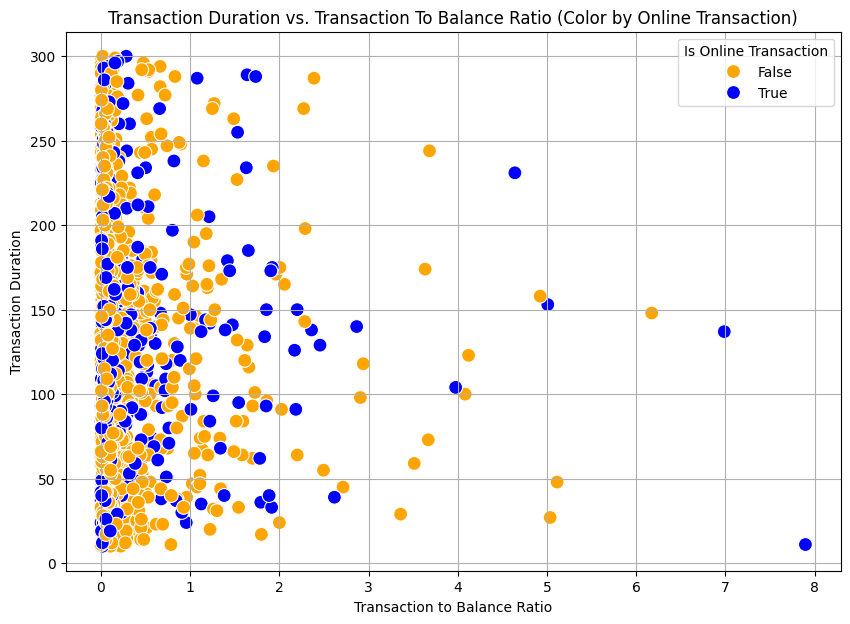

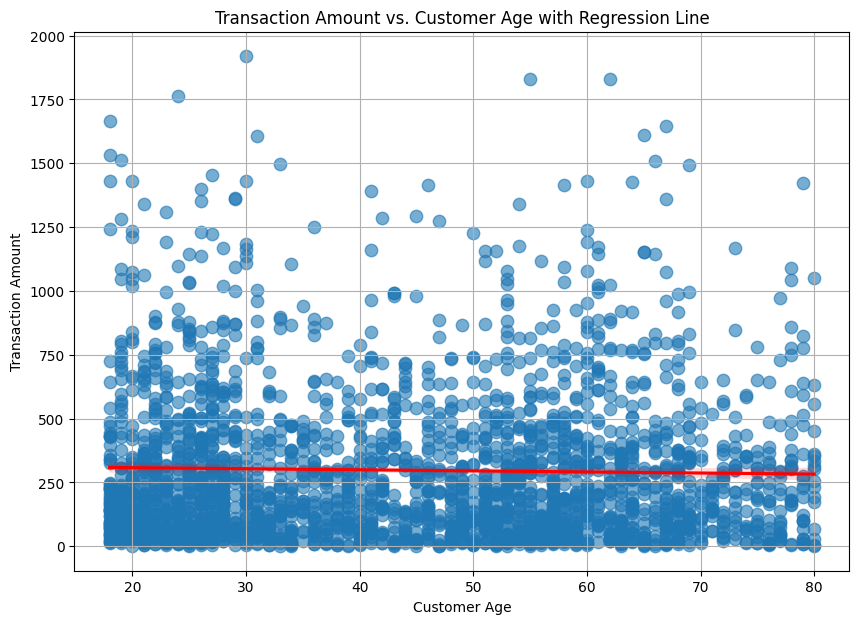

<ipython-input-18-d183bb869ffc>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='TransactionType', y='CustomerAge', data=df, split=True, inner='quartile', palette='Set2')


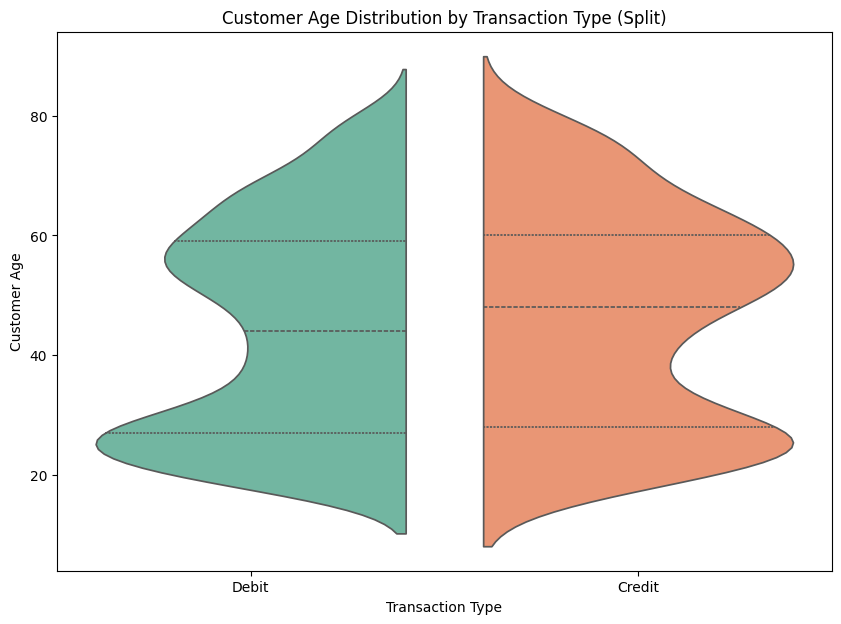

In [ ]:
#10. Transaction Duration vs. Transaction To Balance Ratio (Scatter Plot with Color for IsOnlineTransaction)
plt.figure(figsize=(10, 7))
sns.scatterplot(x='TransactionToBalanceRatio', y='TransactionDuration', hue='IsOnlineTransaction', data=df, palette={True: 'blue', False: 'orange'}, s=100)
plt.title('Transaction Duration vs. Transaction To Balance Ratio (Color by Online Transaction)')
plt.xlabel('Transaction to Balance Ratio')
plt.ylabel('Transaction Duration')
plt.legend(title='Is Online Transaction')
plt.grid(True)
plt.show()

#11. Transaction Amount Distribution by Customer Age (Scatter Plot with Regression Line)
plt.figure(figsize=(10, 7))
sns.regplot(x='CustomerAge', y='TransactionAmount', data=df, scatter_kws={'s': 80, 'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('Transaction Amount vs. Customer Age with Regression Line')
plt.xlabel('Customer Age')
plt.ylabel('Transaction Amount')
plt.grid(True)
plt.show()

#12. Customer Age Distribution by Transaction Type (Violin Plot with Split)
plt.figure(figsize=(10, 7))
sns.violinplot(x='TransactionType', y='CustomerAge', data=df, split=True, inner='quartile', palette='Set2')
plt.title('Customer Age Distribution by Transaction Type (Split)')
plt.xlabel('Transaction Type')
plt.ylabel('Customer Age')
plt.show()


